In [ ]:
from darts.datasets import AirPassengersDataset
from darts.models import ARIMA
from darts.utils.timeseries_generation import datetime_attribute_timeseries
series = AirPassengersDataset().load()
# SARIMAX 모형: 공변량 covariates를 추가 SARIMA(2, 1, 2)(1, 1, 1)12 모형
future_cov = datetime_attribute_timeseries(series, "month", cyclic=True, add_length=12)
model_arima = ARIMA(p=2, d=1, q=2, seasonal_order=(1, 1, 1, 12))
model_arima.fit(series, future_covariates=future_cov)
pred_arima = model_arima.predict(12, future_covariates=future_cov)
pred_arima.values()



/Users/idong-won/anaconda3/envs/analysis-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[447.28287625],
       [423.66233962],
       [458.43963498],
       [497.17031229],
       [509.64119912],
       [569.1229459 ],
       [656.74621181],
       [642.64581564],
       [547.71544564],
       [498.25853543],
       [429.64061848],
       [473.37365707]])

<Axes: xlabel='Month'>

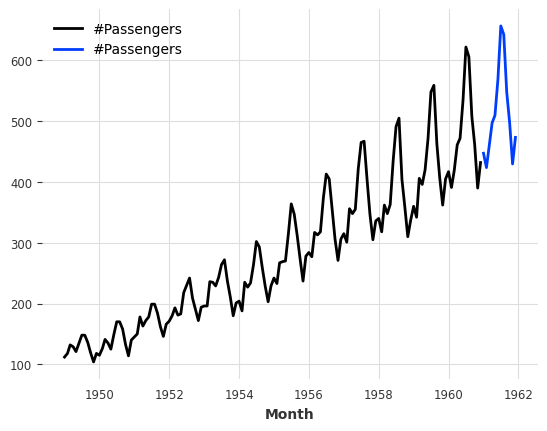

In [2]:
series.plot()
pred_arima.plot()

In [6]:
from darts.metrics import mape
backtest_arima = model_arima.historical_forecasts(
    series, future_covariates=future_cov, start=0.6,
    forecast_horizon=6, stride=1, last_points_only=True)
print("MAPE (ARIMA with future covariates) = {:.2f}%".format(
    mape(series, backtest_arima) * 100))

/Users/idong-won/anaconda3/envs/analysis-env/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/idong-won/anaconda3/envs/analysis-env/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/idong-won/anaconda3/envs/analysis-env/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/idong-won/anaconda3/envs/analysis-env/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

MAPE (ARIMA with future covariates) = 474.50%


<Axes: xlabel='Month'>

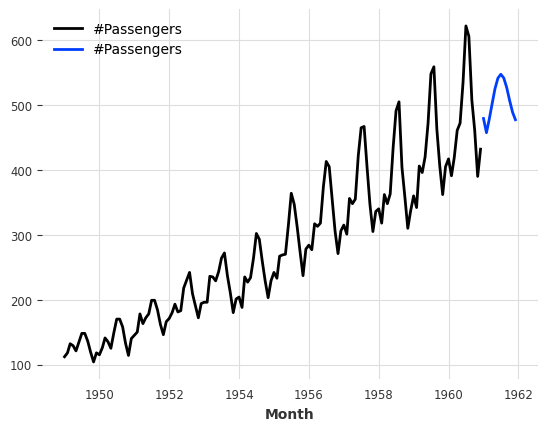

In [11]:
from darts.models import AutoARIMA
model_auto1 = AutoARIMA(seasonal=True)

model_auto1.fit(series, future_covariates=future_cov)
pred_auto1 = model_auto1.predict(12, future_covariates=future_cov)

series.plot()
pred_auto1.plot()

In [12]:
model_auto2 = AutoARIMA(season_length=12)
print(model_auto2)
model_auto2.fit(series, future_covariates=future_cov)
pred_auto2 = model_auto2.predict(12, future_covariates=future_cov)
pred_auto2.values()


AutoARIMA(season_length=12)


array([[445.4276575 ],
       [420.04912881],
       [448.7142377 ],
       [491.23406559],
       [502.67834069],
       [566.04774778],
       [653.357455  ],
       [637.61646049],
       [539.83322875],
       [493.01460603],
       [422.166381  ],
       [464.29338234]])

<Axes: xlabel='Month'>

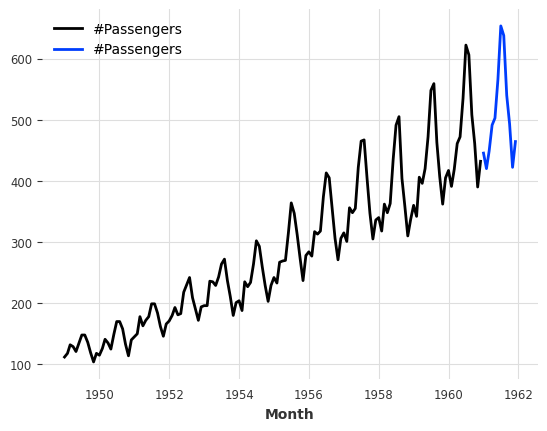

In [13]:
series.plot()
pred_auto2.plot()

In [14]:
backtest_auto2 = model_auto2.historical_forecasts(
    series, future_covariates=future_cov, start=0.6,
    forecast_horizon=6, stride=1
)
print("MAPE (AUTOARIMA_2 with future covariates) = {:.2f}%".format(mape(series, backtest_auto2)))

MAPE (AUTOARIMA_2 with future covariates) = 4.58%


In [ ]:
# MAPE 6.02 > 4.74이므로, SARIMA 모형이 더 우수함.